# Task 1.2: Apply Quantum Operations (Part 2)
## Objective 1b: Advanced & Algorithmic Circuit Library

**Overview:**
This notebook covers high-level algorithmic circuits used in Variational Algorithms, Machine Learning, and Optimization.

- **Advanced Arithmetic:** Comparators, Reciprocals.
- **Particular Quantum Circuits:** Grover Operator, Phase Estimation and others
- **N-Local Circuits:** EfficientSU2, RealAmplitudes (Ansatzes).
- **Oracles & Templates:** Tools for specific algorithms like Grover's.

In [1]:
# Setup: Import necessary libraries
from qiskit import ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import quantum_volume
from qiskit.quantum_info import Operator
import numpy as np


print("Libraries imported successfully.")

Libraries imported successfully.


### Advanced Arithmetic

#### **Advanced Building Blocks: Other Arithmetic Functions**

Qiskit's circuit library contains a variety of specialized arithmetic components. These gates and circuits are essential for building quantum algorithms, these functions exist in two forms: abstract `Gate` representations, which describe the mathematical operation for the transpiler to optimize, and concrete `QuantumCircuit` implementations, which are ready-to-use algorithmic blocks.

**Gate Representation**

- **ExactReciprocalGate**:	Implements an exact reciprocal function `f(x) = 1/x`.
- **IntegerComparatorGate**:	Perform a `≥` or `<` on a qubit register against a classical integer.
- **QuadraticFormGate**:	Implements a quadratic form on binary variables encoded in qubit registers.
- **WeightedSumGate**:	A gate to compute the weighted sum `Σ(wᵢ -**xᵢ)` of qubit registers, each variable is multiplied by a specific weight.

**QuantumCircuit Representation** 

- **ExactReciprocal**:	Exact reciprocal `QuantumCircuit` implmentation
- **IntegerComparator**:	Integer Comparator `QuantumCircuit` implmentation.
- **QuadraticForm**:	Quadratic form `QuantumCircuit` implmentation.
- **WeightedAdder**:	Weighted sum `QuantumCircuit` implmentation.

Integer Comparator Circuit:


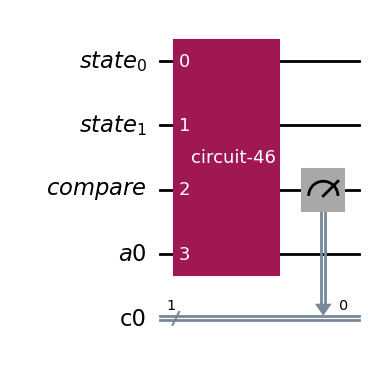

In [2]:
from qiskit.circuit.library import IntegerComparator

# Example 1: Integer Comparator as a Gate
# Compare if a 2-qubit number (0-3) is < 3 
qc = IntegerComparator(2, 3, geq=False)
qc.add_register(ClassicalRegister(1))
#Result is stored in the third qubit (flips if condition is true)
#Output is 0 < 3  => True , third qubit should be flipped
qc.measure(2,0)
print("Integer Comparator Circuit:")
qc.draw('mpl')

Weighted Adder Circuit:


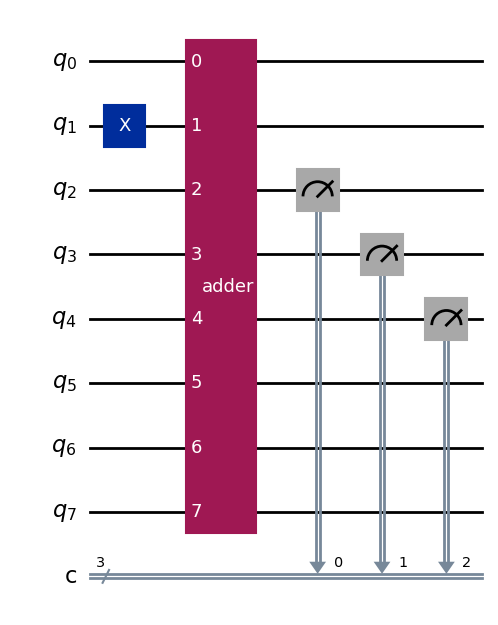

In [3]:
from qiskit.circuit.library import WeightedAdder

# Example 2: Weighted Adder as a Circuit
# Compute weighted sum: 2*x0 + 3*x1
weights = [2, 3]


weighted_adder = WeightedAdder(2, weights=weights)
qc = QuantumCircuit(weighted_adder.num_qubits, 3)
# setup input to represent x1=1 (qubit 1) and x0=0 (qubit 0)
qc.x(1)
# append the weighted adder circuit
qc.append(weighted_adder, range(weighted_adder.num_qubits))
#Output is stored in 3-qubit sum register in qubits 2,3,4
#Output is 3*1 + 2*0 = 3
qc.measure(range(2, 5), range(3))
print("Weighted Adder Circuit:")
qc.draw('mpl')

Measurement Output: {'011': 1000}


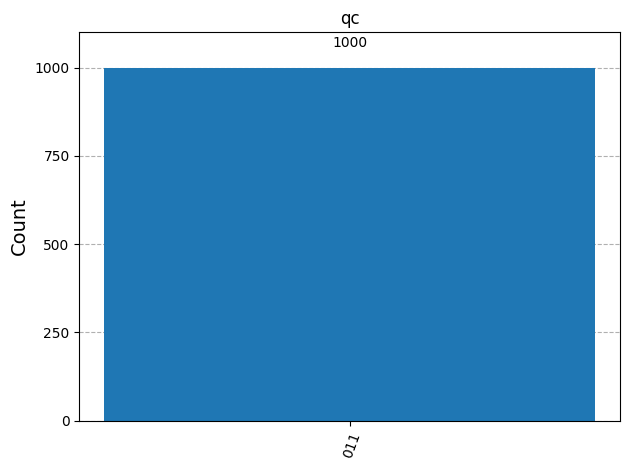

In [4]:
sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc , sim_ideal),shots=1000).result()
counts = result.get_counts(0)
print("Measurement Output:", counts)
plot_histogram(counts, title='qc')


### Particular Quantum Circuits

Specialized circuits for specific quantum algorithms and applications, these functions exist also `Gate` and `QuantumCircuit` representations


- **fourier_checking** :	Fourier checking algorithm circuit .
- **hidden_linear_function** :	Circuit to solve the hidden linear function problem.
- **iqp** :	Instantaneous quantum polynomial time (IQP) circuit.
- **random_iqp** :	Random instantaneous quantum polynomial time (IQP) circuit.
- **quantum_volume** :	Quantum volume model circuit used to measure the Quantum Volume metric.
- **phase_estimation** :	Phase Estimation circuit to estimate the phase `ϕ` of an eigenvalue $e^{2\pi i\phi}$ of a unitary operator U.
- **grover_operator** :	Construct the Grover operator in Grover's search algorithm
- **unitary_overlap** :	Circuit that returns the overlap between two unitaries U2†U1.
- **GraphStateGate** :	Gate representing a graph state.
- **PauliEvolutionGate** :	Time-evolution of an operator consisting of Pauli gates.
- **HamiltonianGate** :	Class for representing evolution by a Hamiltonian operator as a gate.

**QuantumCircuit Representation**

- **FourierChecking** :	Fourier checking `QuantumCircuit` implmentation.
- **GraphState** :	Graph state `QuantumCircuit` implmentation.
- **HiddenLinearFunction** :	Hidden Linear function `QuantumCircuit` implmentation.
- **IQP** :	Instantaneous quantum polynomial (IQP) `QuantumCircuit` implmentation.
- **QuantumVolume** :	Quantum volume model `QuantumCircuit` implmentation.
- **PhaseEstimation** :	Phase Estimation `QuantumCircuit` implmentation.
- **GroverOperator** :	Grover operator `QuantumCircuit` implmentation.
- **UnitaryOverlap** :	Unitary overlap `QuantumCircuit` implmentation​.

Quantum Volume Circuit:


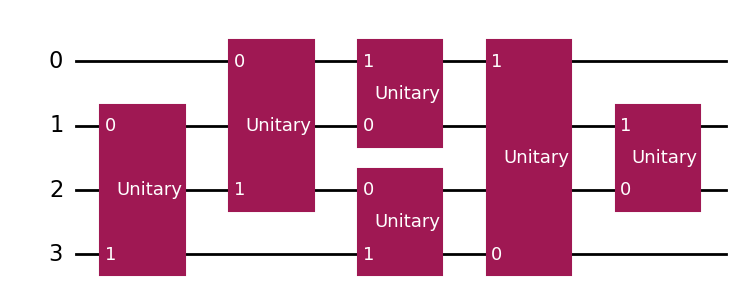

In [5]:
# Example 1: Quantum Volume Circuit 
qc = quantum_volume(4, depth=3)
print("Quantum Volume Circuit:")
qc.draw('mpl')

C:\Users\karim\AppData\Local\Temp\ipykernel_20396\2217740126.py:13: DeprecationWarning: The class ``qiskit.circuit.library.phase_estimation.PhaseEstimation`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.phase_estimation instead.
  phase_est = PhaseEstimation(num_eval_qubits, unitary)


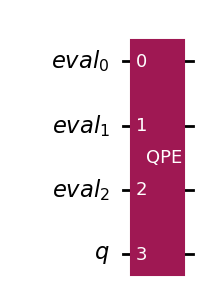

In [6]:
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit.library import RXGate

# Example 2: Phase Estimation as a Circuit
# Estimate the phase of a unitary operator

# Number of evaluation qubits
num_eval_qubits = 3

# Simple unitary - S gate with known phase
unitary = RXGate(np.pi/2)

phase_est = PhaseEstimation(num_eval_qubits, unitary)
phase_est.draw('mpl')

### N-Local Circuits 

N Local Circuits are parameterized quantum circuits that are used as ansatzes in variational quantum algorithms like VQE and QAOA. these functions exist in `BlueprintCircuit` and `QuantumCircuit` representations. BlueprintCircuit wraps the circuits into a block and allow for inplace mutations of the circuits , while QuantumCircuit are optimized for fast consturction.



**`QuantumCircuit` represenation**

- **n_local**:	An n-local variational circuit with alternating rotation and entanglement layers..
- **efficient_su2**:	Hardware-efficient SU(2) 2-local circuit used in variational algorithms and in classificaiton.
- **real_amplitudes**:	Construct a real-amplitudes 2-local circuit used as ansatz in chemistry, optimization or machine learning applications.
- **pauli_two_design**:	Construct a Pauli 2-design ansatz.
- **excitation_preserving**:	Heuristic excitation-preserving wave function ansatz.
- **qaoa_ansatz**:	A generalized QAOA quantum circuit with a support of custom initial states and mixers.
- **hamiltonian_variational_ansatz**:	Construct a Hamiltonian variational ansatz.
- **evolved_operator_ansatz**:	Construct an ansatz out of operator evolutions.

**`BlueprintCircuit` representation** 

- **NLocal**:	n-local `BlueprintCircuit`.
- **TwoLocal**:	two-local `BlueprintCircuit`.
- **PauliTwoDesign**: Pauli Two-Design ansatz `BlueprintCircuit`.
- **RealAmplitudes**: real-amplitudes 2-local `BlueprintCircuit`.
- **EfficientSU2**:	Hardware efficient SU(2) 2-local `BlueprintCircuit`.
- **EvolvedOperatorAnsatz**:	The evolved operator ansatz `BlueprintCircuit`.
- **ExcitationPreserving**:	Excitation-preserving ansatz `BlueprintCircuit` .
- **QAOAAnsatz**:	QAOA `BlueprintCircuit`.


RealAmplitudes Ansatz (3 qubits, pairwise entanglement):

Number of parameters: 9
Parameter names: ['θ[0]', 'θ[1]', 'θ[2]', 'θ[3]', 'θ[4]', 'θ[5]', 'θ[6]', 'θ[7]', 'θ[8]']


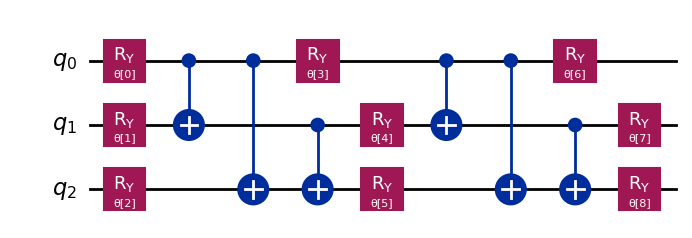

In [7]:
from qiskit.circuit.library import real_amplitudes, EfficientSU2

# Example 1: real_amplitudes ansatz
# Commonly used for quantum chemistry problems
ansatz = real_amplitudes(3, entanglement="full", reps=2)
print("\nRealAmplitudes Ansatz (3 qubits, pairwise entanglement):")
# Show the parameters
print(f"\nNumber of parameters: {ansatz.num_parameters}")
print(f"Parameter names: {[p.name for p in ansatz.parameters]}")
ansatz.draw('mpl')



C:\Users\karim\AppData\Local\Temp\ipykernel_20396\4265856534.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  efficient_ansatz = EfficientSU2(3, entanglement="full", reps=2)



EfficientSU2 Ansatz (3 qubits, full entanglement):


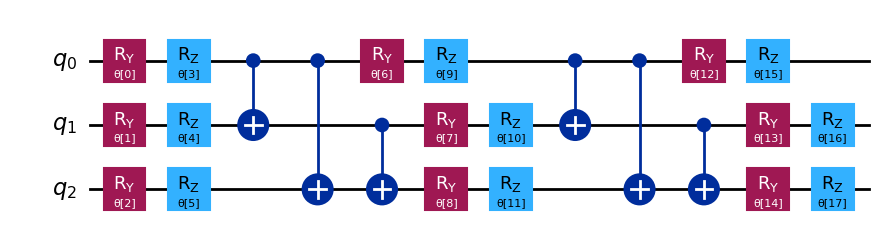

In [8]:
# Example 2: EfficientSU2 ansatz as BlueprintCircuit
# Hardware-efficient ansatz with SU(2) rotations
# use full entanglement and 2 repetitions
efficient_ansatz = EfficientSU2(3, entanglement="full", reps=2)
print("\nEfficientSU2 Ansatz (3 qubits, full entanglement):")
efficient_ansatz.decompose().draw('mpl')

### Data Encoding Ciruicts



Data encoding circuits are used in encode classical data into quantum states for quantum machine learning.Similarly these functions exist in `BlueprintCircuit` and `QuantumCircuit` representations.

**`QuantumCircuit` representation** 

- **pauli_feature_map**: Pauli expansion circuit, it uses pauli gates to encode data.
- **z_feature_map**: First order Pauli Z-evolution circuit.subclass of `pauli_feature_map` where the pauli gates are 'Z' gates only 
- **zz_feature_map**: Second-order Pauli-Z evolution circuit.

**`BlueprintCircuit` representation** 

- **PauliFeatureMap**:	Pauli Expansion `BlueprintCircuit`.
- **ZFeatureMap**:	First order Pauli Z-evolution `BlueprintCircuit`.
- **ZZFeatureMap**:	Second-order Pauli-Z evolution `BlueprintCircuit`.



ZFeatureMap (3 qubits, 2 repetitions):


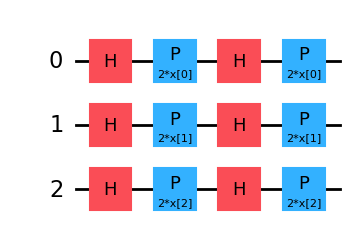

In [9]:
from qiskit.circuit.library import z_feature_map

# Example 1: PauliFeatureMap as BlueprintCircuit
z_map = z_feature_map(3, reps=2)
print("\nZFeatureMap (3 qubits, 2 repetitions):")
z_map.draw('mpl')

C:\Users\karim\AppData\Local\Temp\ipykernel_20396\865897456.py:4: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation.pauli_feature_map.PauliFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the pauli_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  p_map = PauliFeatureMap(3, reps=2, paulis=['ZZ', 'XX'])



PauliFeatureMap (3 qubits, 2 repetitions):


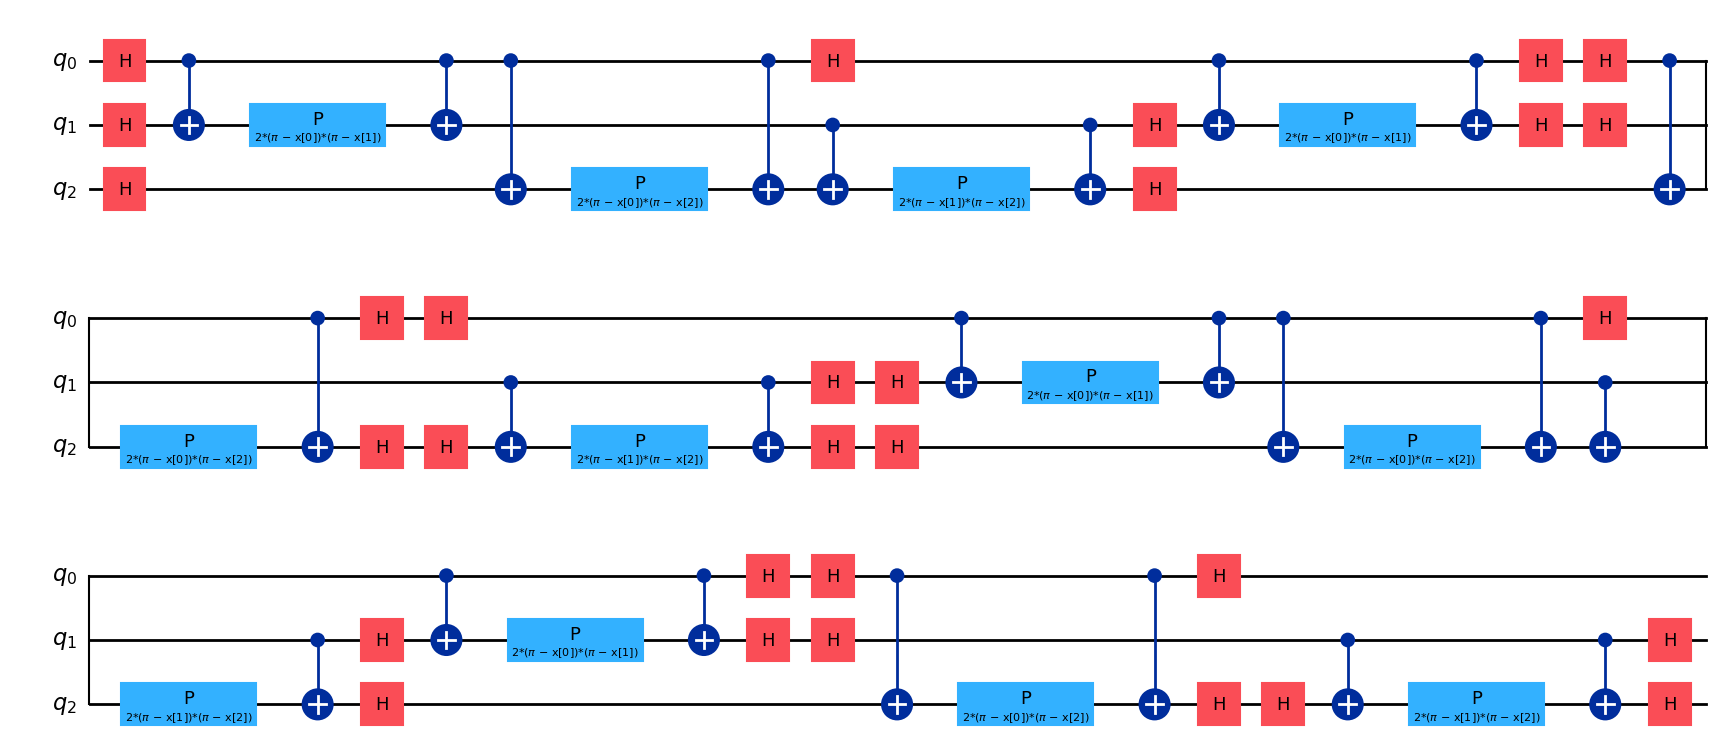

In [10]:
from qiskit.circuit.library import PauliFeatureMap

# Example 1: PauliFeatureMap as BlueprintCircuit
p_map = PauliFeatureMap(3, reps=2, paulis=['ZZ', 'XX'])
print("\nPauliFeatureMap (3 qubits, 2 repetitions):")
p_map.decompose().draw('mpl')

### Data Prepration Circuits

- **StatePrepration** : used for complex amplitude state preparation.
- **Initialize**: complex amplitude initialization. it is an `Insturction` not a `Gate` since it contains a reset instruction


State Preparation Circuit for |ψ⟩ = (|00⟩ + |11⟩)/√2:


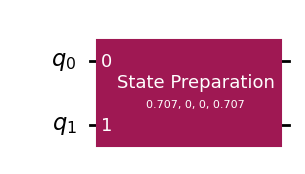

In [11]:
# Example: State Preparation Circuit
from qiskit.circuit.library import StatePreparation

# Prepare a specific 3-qubit state |ψ⟩ = (|00⟩ + |11⟩)/√2
# Define the target state amplitudes 00, 01, 10, 11
target_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
state_prep = StatePreparation(target_state)
print("\nState Preparation Circuit for |ψ⟩ = (|00⟩ + |11⟩)/√2:")
# use in circuit
qc = QuantumCircuit(state_prep.num_qubits)
qc.append(state_prep, range(state_prep.num_qubits))
qc.draw('mpl')


### Oracles

black-box operations on quantum circuits

**`Gate` represenation**

- **PhaseOracleGate**: implements a phase oracle.
- **BitFlipOracleGate**: implements a bitflip oracle

**`QuantumCircuit` represenation**

- **PhaseOracle**: phase oracle


Bit Flip Oracle for expression: (a | b | c)


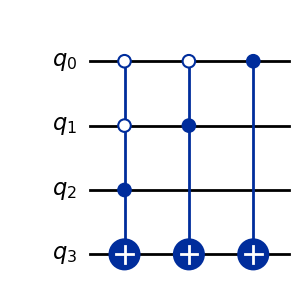

In [12]:
from qiskit.circuit.library import BitFlipOracleGate

# Example 1: BitFlip Oracle Gate
# Create an oracle that marks solutions to (a | b | c)

logical_expr = "(a | b | c)"
oracle = BitFlipOracleGate(logical_expr)
qc=QuantumCircuit(oracle.num_qubits)
qc.append(oracle, range(oracle.num_qubits))
print("\nBit Flip Oracle for expression:", logical_expr)
qc.decompose().draw('mpl')


Phase Oracle for expression: (a & b) | (c & d)


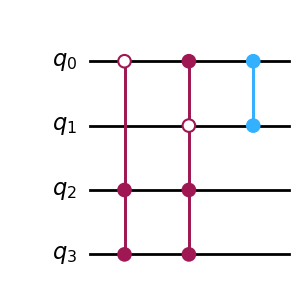

In [13]:
from qiskit.circuit.library import PhaseOracleGate

# Example 2: Phase Oracle for logical expressions
# Create an oracle that marks solutions to (a AND b) OR (c AND d)

logical_expr = "(a & b) | (c & d)"
oracle = PhaseOracleGate(logical_expr)
qc=QuantumCircuit(oracle.num_qubits)
qc.append(oracle, range(oracle.num_qubits))
print("\nPhase Oracle for expression:", logical_expr)
qc.decompose().draw('mpl')

### Template Circuits



Templates return circuits that compute the identity, and they are mainly used for circuit optimization. 

- **NCT (Not-CNot-toffoli)** : use `XGate`, `CXGate`, `CCXGate`
- **Clifford** : use Cllifford Gates
- **RZX** : use `RZXGate`


Template Verification:
template_nct_4b_1 is identity: True

Template Circuit (template_nct_4b_1):


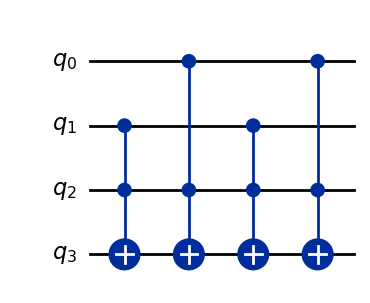

In [14]:
from qiskit.circuit.library.templates import template_nct_4b_1

# Example 1: template_nct_4b_1 verification
template = template_nct_4b_1()
identity = np.identity(2 ** len(template.qubits), dtype=complex)
data = Operator(template).data
is_identity = np.allclose(data, identity)

print("\nTemplate Verification:")
print(f"template_nct_4b_1 is identity: {is_identity}")

print("\nTemplate Circuit (template_nct_4b_1):")
template.draw('mpl')

---
## Summary
---

In this notebook, we covered:

## Advanced & Algorithmic Circuit Library:

1. **Advanced Arithmetic Circuits :** like comparators, reciprocals, and weighted sum cirucits.
2. **Particular Quantum Circuits:** like Grover operator, phase estimation and others
3. **N-Local Circuits:** like EfficientSU2, RealAmplitudes (Ansatzes).
4. **Oracles:** like phase flip and bit flip oracles.
5. **Templates:** ciruicts that compute the identity that are used for circuit optimization.



---

## Practice Questions

**1. Which of these circuits would you use to compute the weighted sum 2*x₀ + 3*x₁ where x₀ and x₁ are binary inputs encoded in qubits?**

```
from qiskit.circuit.library import ______
weights = [2, 3]
circuit = ______(2, weights=weights)
```

What should fill in the blanks?

A) WeightedGate and WeightedGate

B) WeightedAdder and WeightedAdder

C) WeightedSum and WeightedSumCircuit

D) IntegerAdder and WeightedAdder


***Answer:***
<Details>
<br/>
B) WeightedAdder can be used to compute the weighted sum of the qubits
</Details>

----

**2) What does the following code demonstrate about template circuits?**

```
from qiskit.circuit.library.templates import template_nct_4b_1
from qiskit.quantum_info import Operator
import numpy as np

template = template_nct_4b_1()
identity = np.identity(2 ** len(template.qubits), dtype=complex)
data = Operator(template).data
is_identity = np.allclose(data, identity)
print(f"Template is identity: {is_identity}")
```

A) Templates are optimized versions of common circuits

B) Templates are error correction circuits

C) Templates are parameterized circuits for variational algorithms

D) Templates compute the identity operation and are used for circuit optimization


***Answer:***
<Details>
<br/>
D) Templates return circuits that compute the identity operation and are used during circuit optimization
</Details>

----